In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from fredapi import Fred

In [6]:
fred = Fred(api_key='6cc00d6dd7a79e8de471491dc74cc1fe')
nber=fred.get_series('USREC')

In [7]:

df=pd.read_csv('khlmaja.csv',index_col=0)
df['target']=nber
df['target'].fillna(method='ffill',inplace=True)
df.drop(index='2023-04-30',inplace=True)
df=df.fillna(0)

In [8]:
df_train=df[:10000]
df_test=df[10000:]

In [9]:
var_columns = [col for col in df_train.columns if col not in ['target']]

x= df_train.loc[:,var_columns]
y = df_train.loc[:,'target']

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [11]:
class BernoulliDistributionLoss:
    def __call__(self, y_true, y_pred):
        # Calculate probability of success
        p = 1.0 / (1.0 + np.exp(-y_pred))

        # Calculate log-likelihood of the true labels
        ll = y_true * np.log(p) + (1 - y_true) * np.log(1 - p)

        # Calculate gradient of the loss function
        grad = p - y_true

        # Calculate hessian of the loss function
        hess = p * (1 - p)

        return ll, grad, hess

In [12]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=learning_rate,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
    model_gbm.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model_gbm.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model_gbm.score(X_test, Y_test)))

Learning rate:  0.05
Accuracy score (training): 0.975
Accuracy score (validation): 0.961
Learning rate:  0.075
Accuracy score (training): 0.974
Accuracy score (validation): 0.963
Learning rate:  0.1
Accuracy score (training): 0.977
Accuracy score (validation): 0.964
Learning rate:  0.25
Accuracy score (training): 0.980
Accuracy score (validation): 0.965
Learning rate:  0.5
Accuracy score (training): 0.981
Accuracy score (validation): 0.967
Learning rate:  0.75
Accuracy score (training): 0.965
Accuracy score (validation): 0.951
Learning rate:  1
Accuracy score (training): 0.978
Accuracy score (validation): 0.966


In [13]:
from sklearn.metrics import f1_score
results=pd.DataFrame()
results['actual']=df[df.columns[-1]]
results['pred']=model_gbm.predict(df[df.columns[:-1]])

dfff=results.iloc[10000:]

f1_score(dfff['actual'], dfff['pred'])

0.061611374407582936

In [14]:
import matplotlib.pyplot as plt

<Axes: >

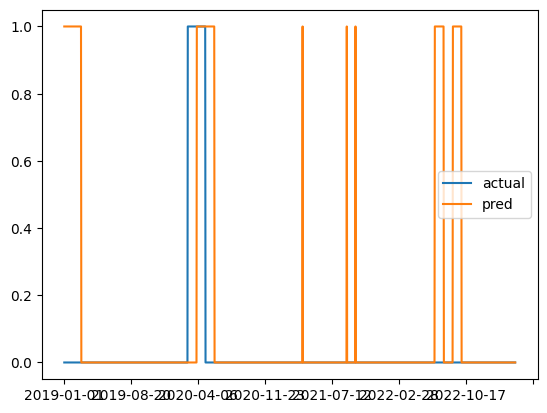

In [30]:
results=pd.DataFrame()
results['actual']=df[df.columns[-1]]
results['pred']=model_gbm.predict(df[df.columns[:-1]])
results.loc['2019':].plot()


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
model_gbm2 = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=0.5,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
model_gbm2.fit(X_train, Y_train)
prediction=model_gbm2.predict(df[df.columns[:-1]])


In [26]:
print("Classification Report")
print(classification_report(df[df.columns[-1]], prediction))

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     11744
         1.0       0.37      0.91      0.52      1919

    accuracy                           0.77     13663
   macro avg       0.67      0.83      0.69     13663
weighted avg       0.89      0.77      0.80     13663

